In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import scipy,heapq
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
X,y=iris.data,iris.target

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
#KNN classifier
def KNN(X_train,X_test,k):
    y_label=[]
    for i in range(len(X_test)):
        x=X_test[i,:].reshape(1,-1)
        dist=scipy.spatial.distance.cdist(X_train,x,metric='euclidean')
        closest=heapq.nsmallest(k,range(len(dist)),dist.take)
        y_neigh=[]

        for j in range(len(closest)):
            y_neigh.append(y_train[closest[j]])
        y_label.append(max(set(y_neigh),key=y_neigh.count))
    return y_label

In [5]:
vals=[i for i in range(1,51)]
mserr=[]
for k in vals:
    y_pred=KNN(X_train,X_test,k)
    mse=metrics.mean_squared_error(y_test,y_pred)
    mserr.append(mse)

In [10]:
max(mserr)

0.03333333333333333

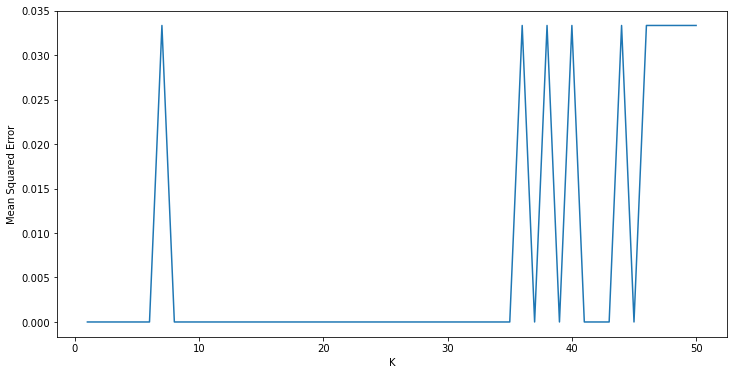

In [6]:
plt.figure(figsize=(12,6))
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.plot(vals,mserr)

In [11]:
grid_params={'n_neighbors':np.arange(1,51),'weights':['distance'],'metric':['euclidean']}

knn_gsv=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=2)
knn_gsv.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['distance']},
             verbose=1)

In [13]:
knn_gsv.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}